In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.array([1, 5, 3, 7])
h = np.array([6, 4, 0, 2])

def func (x, h):

    y = np.zeros(len(h)+len(x)-1)

    for p in range(0, len(x)):
        for q in range(0, len(h)):

            y[p+q] = y[p+q] + x[p]* h[q]


    return y

In [ ]:
print(func(x, h))
print(np.convolve(x, h))

[ 6. 34. 38. 56. 38.  6. 14.]
[ 6 34 38 56 38  6 14]


<StemContainer object of 3 artists>

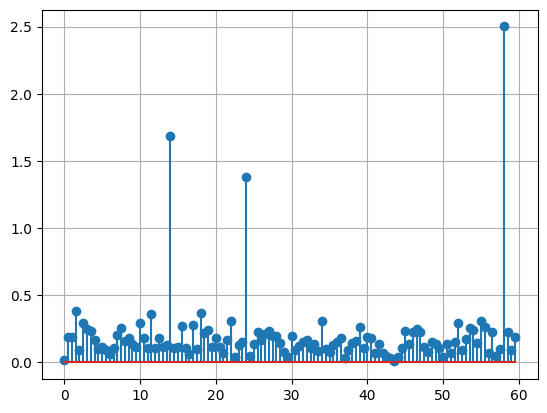

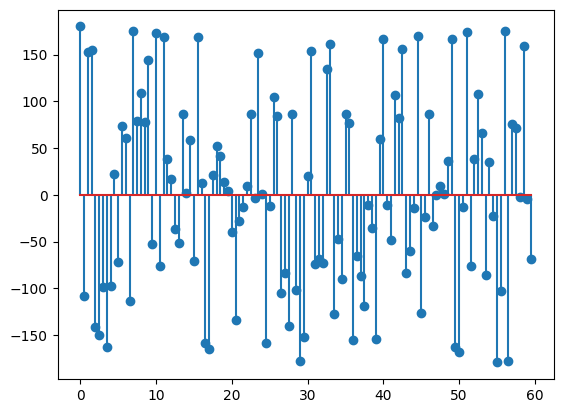

In [ ]:
# carregando o sinal
pi = np.pi
s = 0
Ts = 1/1e3
with open('sinal.npy','rb') as arq:
    s = np.load(arq)

t = np.arange(0,len(s)*Ts,Ts)

fs = 1/Ts
N = len(s)
S = np.fft.fft(s)
#print(S)
df = fs/N
f = np.arange(0, fs, df)



plt.figure()
plt.clf()
plt.stem(f[0:120], 2*abs(S[0:120])/N)
plt.grid()

plt.figure()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:120], Fase[0:120])

In [ ]:
s1=2*abs(S[28])/N
s2=2*abs(S[48])/N
s3=2*abs(S[116])/N

print('Em 14 Hz: ', (2*abs(S[28])/N))
print('Em 24 Hz: ', 2*abs(S[48])/N)
print('Em 58 Hz: ', (2*abs(S[116])/N) )


Em 14 Hz:  1.6871060770205757
Em 24 Hz:  1.3780029768978215
Em 58 Hz:  2.501125703401277


Em 14 Hz:  98.19411189745763 % ou 1.656638829098392 em termos absolutos
Em 24 Hz:  94.24555275368209 % ou 1.298706522539546 em termos absolutos
Em 58 Hz:  72.80153738330708 % ou 1.8208579639651827 em termos absolutos


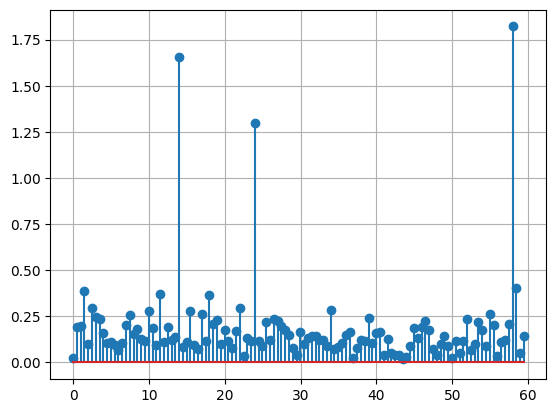

In [ ]:
M = 7
h = np.ones(M)*(1/M)
y = func(h, s)
y = y[int(len(x)/2):len(y)-int(len(x)/2)]
fs = 1/Ts
N = len(y)
S1 = np.fft.fft(y)
#print(S)
df = fs/N
f = np.arange(0, fs, df)
# retira as bordas
plt.figure()
plt.clf()
plt.stem(f[0:120], 2*abs(S1[0:120])/N)
plt.grid()
print('Em 14 Hz: ', (2*abs(S1[28])/(N)/s1)*100, '% ou' ,2*abs(S1[28])/(N), 'em termos absolutos')
print('Em 24 Hz: ', 2*abs(S1[48])/(N)/s2*100,'% ou' ,2*abs(S1[48])/(N), 'em termos absolutos')
print('Em 58 Hz: ', (2*abs(S1[116])/(N)/s3)*100,'% ou' ,2*abs(S1[116])/(N), 'em termos absolutos')

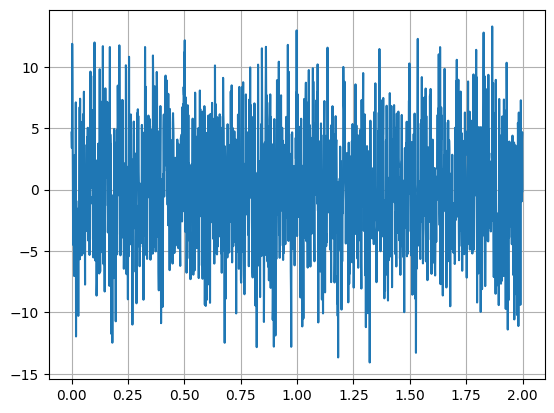

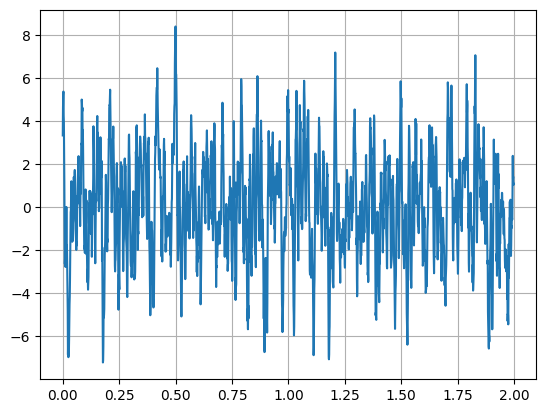

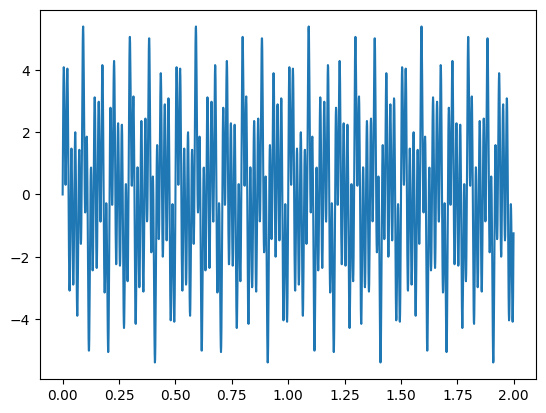

In [ ]:
t = np.arange(0,len(s)*Ts,Ts)
plt.figure()
plt.clf()
plt.plot(t,s)
plt.grid(True)
plt.show()

t = np.arange(0,len(s)*Ts,Ts)
plt.figure()
plt.clf()
plt.plot(t,y)
plt.grid(True)
plt.show()

r = 1.6871060770205757*np.sin(2*pi*14*t)+1.3780029768978215*np.sin(2*pi*24*t)+2.501125703401277*np.sin(2*pi*58*t)
plt.plot(t, r)
